<b> $Mohammad \: Morsali$ | $400101956$ <b>

 ## c-1 

In [ ]:
##qeustionC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
np.random.seed(400101956)
times = []
for i in range(1024):
    tail = False
    drawNumber = 0
    while drawNumber == 1024 or not tail:
        headTail = np.random.randint(0, 2, 1)
        drawNumber += 1
        if (headTail[0] == 1):
            tail = True
    times += [drawNumber]

In [54]:
df = pd.DataFrame(times).iloc[::, 0].value_counts().rename("Counts").reset_index().rename(columns={"index": "Times"})
table = pd.concat([df, (2 ** (df["Times"] - 1)).rename("Score")], axis=1).set_index("Times").sort_index()
table

,Counts,Score
Times,,
1,518,1
2,256,2
3,131,4
4,57,8
5,39,16
6,13,32
7,4,64
9,4,256
10,1,512


In [56]:
table.to_csv("D:/Morsali_ 400101956/res.csv")

# b-4

## b-4-1
## b-4-2

In [122]:
class benfordProb():
    def __init__(self) -> None:
        np.random.seed(400101956)
        unif = np.random.uniform(1, 10000, 1000)
        self.list_benford = pd.DataFrame(unif)[0].transform(self.leftDigit)

    def leftDigit(self, x) -> int:
        return int(str(x)[0])

    def get_random_digit(self) -> int:
        return self.list_benford[np.random.randint(0, 1000)]

## b-4-3

In [63]:
benfordProbability = benfordProb()
tempList = []
for i in range(1_000):
    tempList.append(benfordProbability.get_random_digit())

In [126]:
tempList = pd.DataFrame(tempList, columns=["Digit"])
tempList["Digit"].value_counts(normalize=True).sort_index()

1    0.113
2    0.117
3    0.123
4    0.136
5    0.118
6    0.102
7    0.078
8    0.094
9    0.119
Name: Digit, dtype: float64

# b-5

In [129]:
# read data
df = pd.read_csv("./movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [132]:
# sum of NAN values in each column
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [67]:
# delete rows with NAN values
df.dropna(inplace=True)

In [68]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [71]:
genre = df.groupby(["genre"]).size().sort_values(ascending=False)
genre

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
dtype: int64

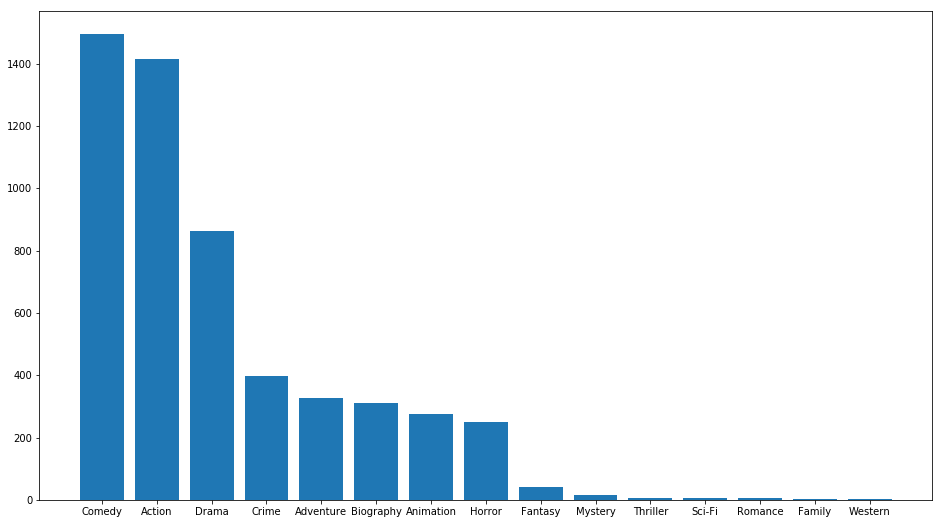

In [72]:
fig1, ax1 = plt.subplots(1, 1, figsize=(16, 9))
ax1.bar(genre.index, genre.values);

# b-6

In [133]:
year = df.groupby(["year"]).size().sort_index()
year

year
1980     92
1981    113
1982    126
1983    144
1984    168
1985    200
1986    200
1987    200
1988    200
1989    200
1990    200
1991    200
1992    200
1993    200
1994    200
1995    200
1996    200
1997    200
1998    200
1999    200
2000    200
2001    200
2002    200
2003    200
2004    200
2005    200
2006    200
2007    200
2008    200
2009    200
2010    200
2011    200
2012    200
2013    200
2014    200
2015    200
2016    200
2017    200
2018    200
2019    200
2020     25
dtype: int64

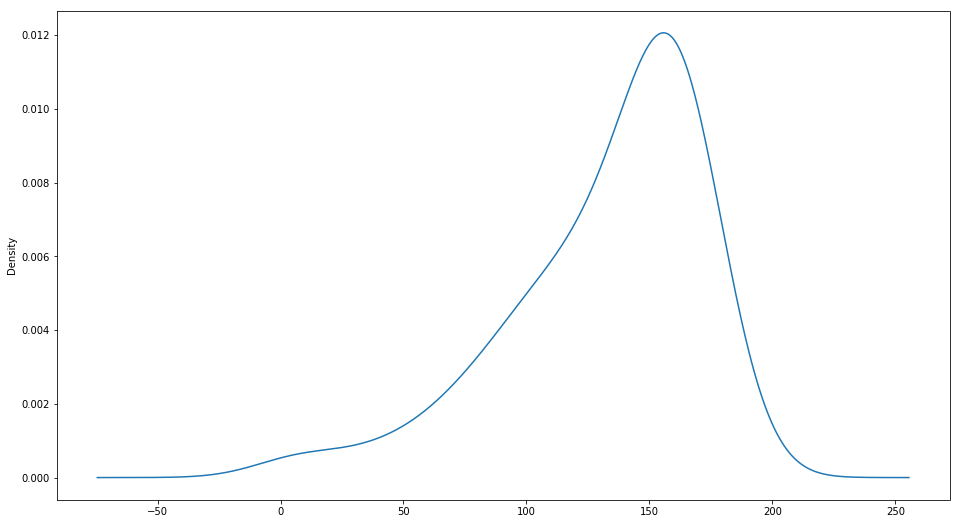

In [74]:
fig2, ax2 = plt.subplots(1, 1, figsize=(16, 9))
year.plot(kind='kde', ax=ax2);

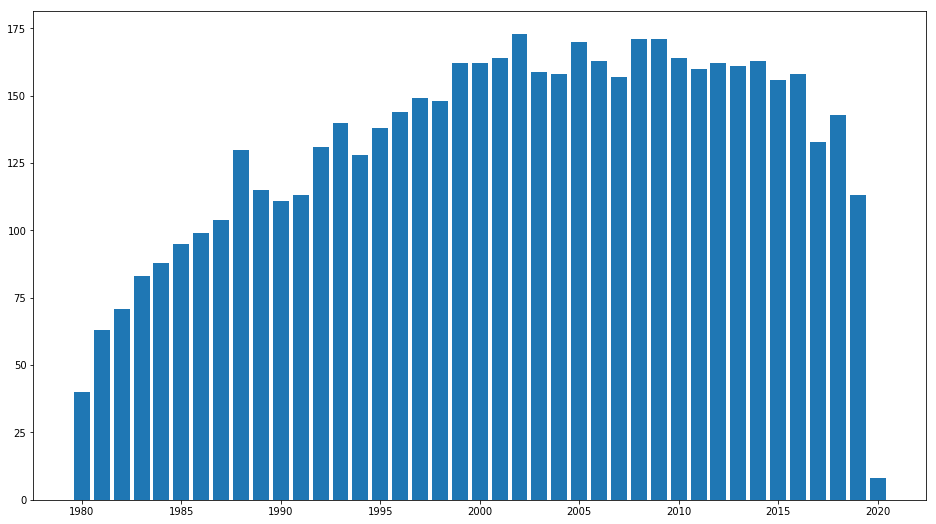

In [75]:
fig3, ax3 = plt.subplots(1, 1, figsize=(16, 9))
ax3.bar(year.index, year.values);

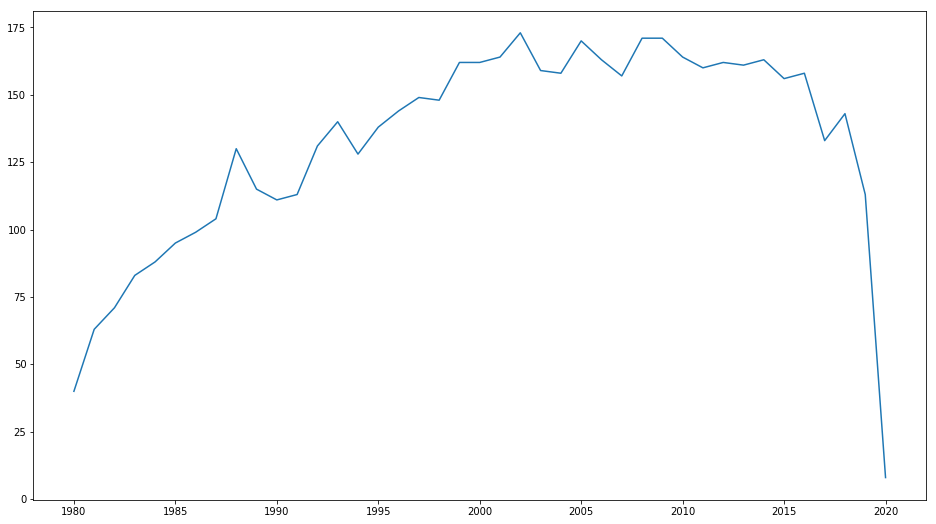

In [76]:
fig4, ax4 = plt.subplots(1, 1, figsize=(16, 9))
ax4.plot(year.index, year.values);

# b-7

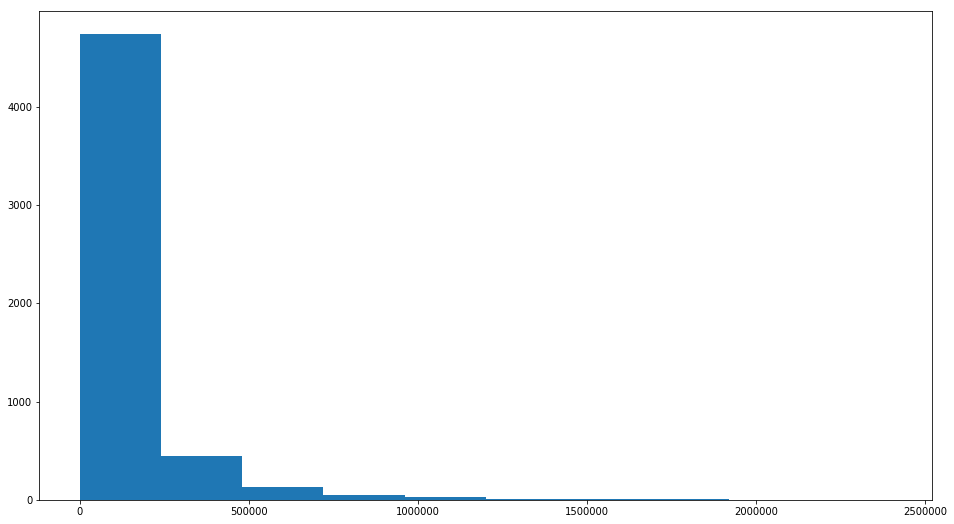

In [77]:
fig5, ax5 = plt.subplots(1, 1, figsize=(16, 9))
ax5.hist(df["votes"]);

# b-8

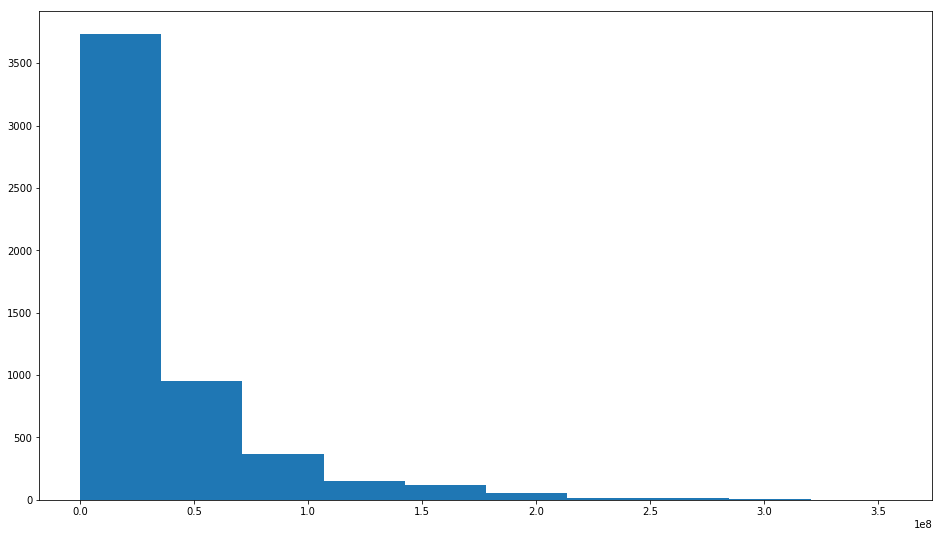

In [78]:
fig6, ax6 = plt.subplots(1, 1, figsize=(16, 9))
ax6.hist(df["budget"]);

# b-9

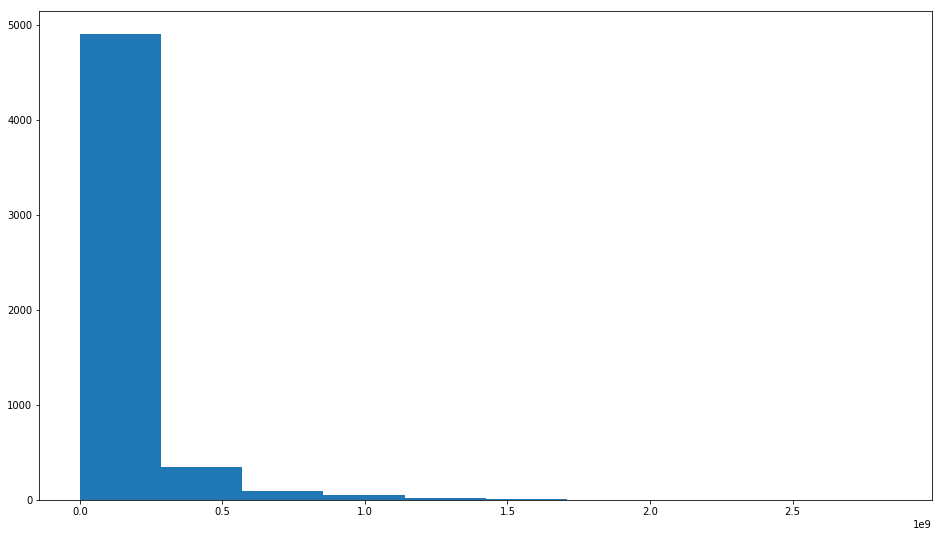

In [79]:
fig7, ax7 = plt.subplots(1, 1, figsize=(16, 9))
ax7.hist(df["gross"]);

# b-10

In [80]:
def leftDigit(x) -> int:
    return int(str(x)[0])

In [109]:
def getTable(bins, counts) -> pd.DataFrame:
    temp = {}
    for i in zip(bins, counts, round(pd.Series(counts) / sum(counts) * 100, 1)):
        temp[i[0]] = i
    
    return pd.DataFrame(temp).T.rename(columns={0: "Digit", 1: "Counts", 2: "Percentage"}).set_index("Digit").astype({"Counts": int, "Percentage": float})

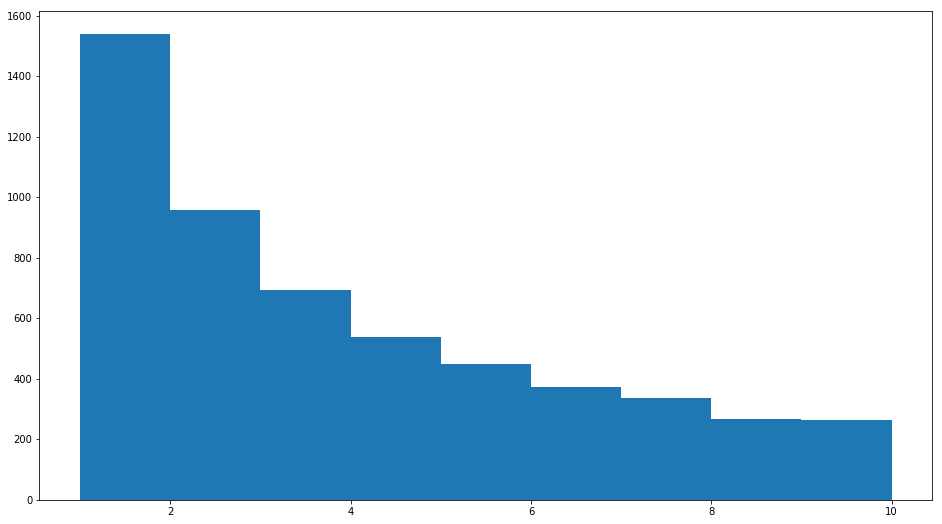

In [110]:
fig8, ax8 = plt.subplots(1, 1, figsize=(16, 9))
counts_1, bins_1, patchs_1 = ax8.hist(df["votes"].transform(leftDigit), bins=list(range(1, 11)));

In [142]:
temp = {}
for i in zip(bins_1, counts_1, round(pd.Series(counts_1) / sum(counts_1) * 100, 1)):
    temp[i[0]] = i
    
pd.DataFrame(temp).T

,0,1,2
1,1.0,1540.0,28.4
2,2.0,959.0,17.7
3,3.0,693.0,12.8
4,4.0,537.0,9.9
5,5.0,450.0,8.3
6,6.0,373.0,6.9
7,7.0,337.0,6.2
8,8.0,267.0,4.9
9,9.0,265.0,4.9


In [111]:
voteTable = getTable(bins_1, counts_1)
voteTable

,Counts,Percentage
Digit,,
1.0,1540,28.4
2.0,959,17.7
3.0,693,12.8
4.0,537,9.9
5.0,450,8.3
6.0,373,6.9
7.0,337,6.2
8.0,267,4.9
9.0,265,4.9


In [104]:
d = {}
for i in (zip(bins_1, counts_1, round(pd.Series(counts_1) / sum(counts_1) * 100, 1))):
    d[i[0]] = i
    
pd.DataFrame(d).T

,0,1,2
1,1.0,1540.0,28.4
2,2.0,959.0,17.7
3,3.0,693.0,12.8
4,4.0,537.0,9.9
5,5.0,450.0,8.3
6,6.0,373.0,6.9
7,7.0,337.0,6.2
8,8.0,267.0,4.9
9,9.0,265.0,4.9


# b-11

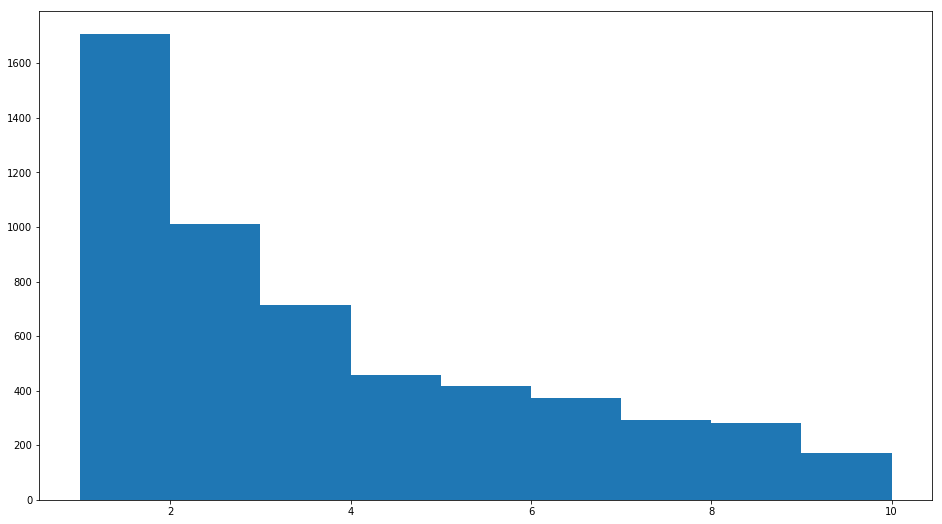

In [84]:
fig9, ax9 = plt.subplots(1, 1, figsize=(16, 9))
counts_2, bins_2, patchs_2 = ax9.hist(df["budget"].transform(leftDigit), bins=list(range(1, 11)));

In [113]:
budgetTable = getTable(bins_2, counts_2)
budgetTable

,Counts,Percentage
Digit,,
1.0,1708,31.5
2.0,1010,18.6
3.0,713,13.2
4.0,457,8.4
5.0,416,7.7
6.0,372,6.9
7.0,292,5.4
8.0,282,5.2
9.0,171,3.2


# b-12

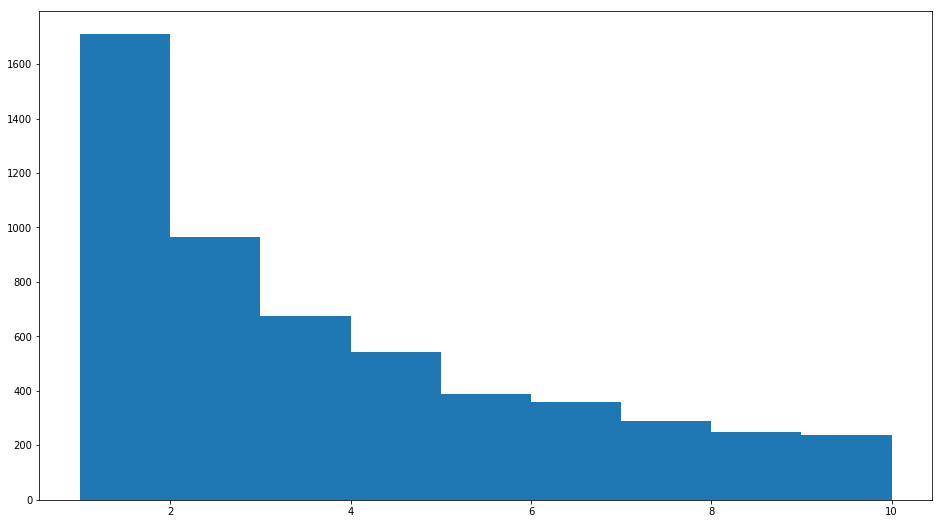

In [114]:
fig10, ax10 = plt.subplots(1, 1, figsize=(16, 9))
counts_3, bins_3, patchs_3 = ax10.hist(df["gross"].transform(leftDigit), bins=list(range(1, 11)));

In [115]:
grossTable = getTable(bins_3, counts_3)
grossTable

,Counts,Percentage
Digit,,
1.0,1711,31.6
2.0,964,17.8
3.0,676,12.5
4.0,544,10.0
5.0,388,7.2
6.0,358,6.6
7.0,291,5.4
8.0,250,4.6
9.0,239,4.4


In [116]:
from scipy.stats import chisquare

In [117]:
def benfordPValue(values) -> float:
    benfordsLaw = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
    temp = chisquare(voteTable["Percentage"].values, benfordsLaw)
    return temp.pvalue

In [118]:
votePValue = benfordPValue(voteTable)
votePValue

0.999996910809314

In [119]:
budgetPValue = benfordPValue(budgetTable)
budgetPValue

0.999996910809314

In [120]:
grossPValue = benfordPValue(grossTable)
grossPValue

0.999996910809314

# a-2

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import random as rnd

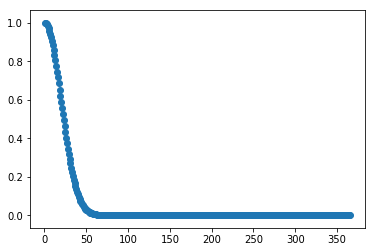

In [10]:
def prob(n):
    probability = 1
    for i in range(n):
        probability *= (365-i) / 365
    return probability

fig = plt.figure()
ax1 = fig.add_subplot()

n = np.arange(1, 366, 1)
p = []

for i in n:
    p.append(find_probability(i))
plt.scatter(n, p)

# a-4

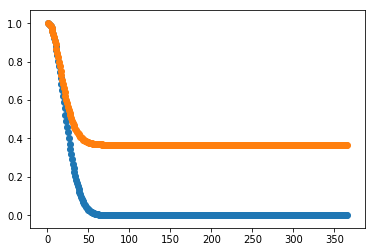

In [23]:
import random as rnd

def prob(n):
    probability = [1, 1]
    for i in range(n):
        probability[0] *= (365-i) / 365
    probability[1] = np.exp(probability[0]-1)
    return probability
fig = plt.figure()
ax1 = fig.add_subplot()
n = np.arange(1, 366, 1)
p = []
q = []
for i in n:
    p.append(find_probability(i)[0])
    q.append(find_probability(i)[1])
plt.scatter(n, p_prime)
plt.scatter(n, q_prime)

# a-5

In [36]:
import random as rnd
def generate(seed,n):
    rnd.seed(seed)
    event = set()
    for i in range(n):
        event.add(rnd.randrange(1,366))
    return event
def count(seed, n):
    counter = 0
    for j in range(1,1001):
        if len(generate(seed+j, n)) < 10 :
            counter += 1
    print(counter)
seed = 400101956
n = 10
count(seed, n)

124


# a-6

In [28]:
from matplotlib import pyplot as plt
import random as rnd
import numpy as np

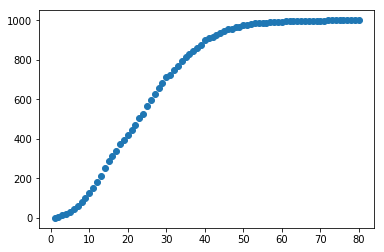

In [39]:
def generator(seed,n):
    rnd.seed(seed)
    event = set()
    for i in range(n):
        event.add(rnd.randrange(1,366))
    return event
def count(seed, n):
    events = []
    for i in n:
        counter = 0
        for j in range(1,1001):
            if len(generator(seed+j, i)) < i :
                counter += 1
        events.append(counter)
    return events
seed = 400101956
fig, ax = plt.subplots()
n = np.arange(1, 81, 1)
event = count(seed, n)

ax.scatter(n, event)

plt.show()